# Image classification

## Data Collection

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-11 05:58:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 64.233.184.128, 172.253.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   198MB/s    in 0.3s    

2020-07-11 05:58:33 (198 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Main Folder

*   Train -- cats and dogs

*   validation -- cats and dogs




In [ ]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [ ]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['cats', 'dogs']

In [ ]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))

1000
1000


In [ ]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## Directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')


In [ ]:
## File names
train_cat_filenames = os.listdir(train_cat_dir )
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

In [ ]:
os.listdir()

['.config', '.ipynb_checkpoints', 'sample_data']

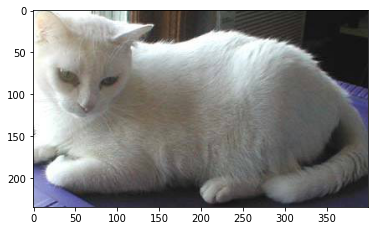

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

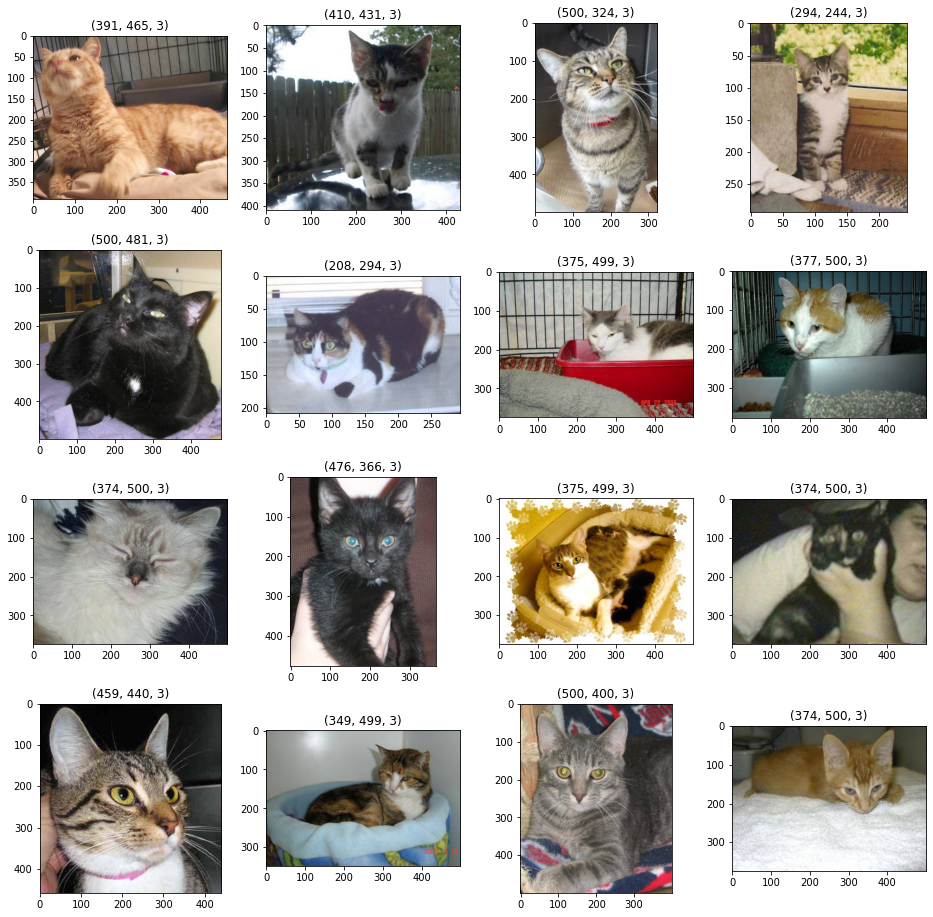

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j = 1  ## plot position
for i in range(16):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis='off'
  j += 1


Read the image data<br>
We have different shapes here.<br>
We need same shape for each and every image<br>
reshaing the images<br>
cats and dogs labelling<br>


## Creating Train and valiadtion data from Folder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

(20, 150, 150, 3)
(20,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


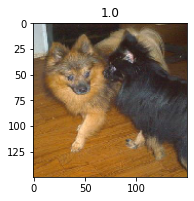

In [ ]:
imgs,labels = train_generator.next() #generates next image
#print(i)
print(imgs.shape)
print(labels.shape)
p = 1 
plt.subplots(figsize=(16,16))
for j in range(20): #jrepresents index of the image
  plt.subplot(4,5,p)
  plt.imshow(imgs[j,:,:,:])
  plt.title(labels[j])
  plt.axis='off'

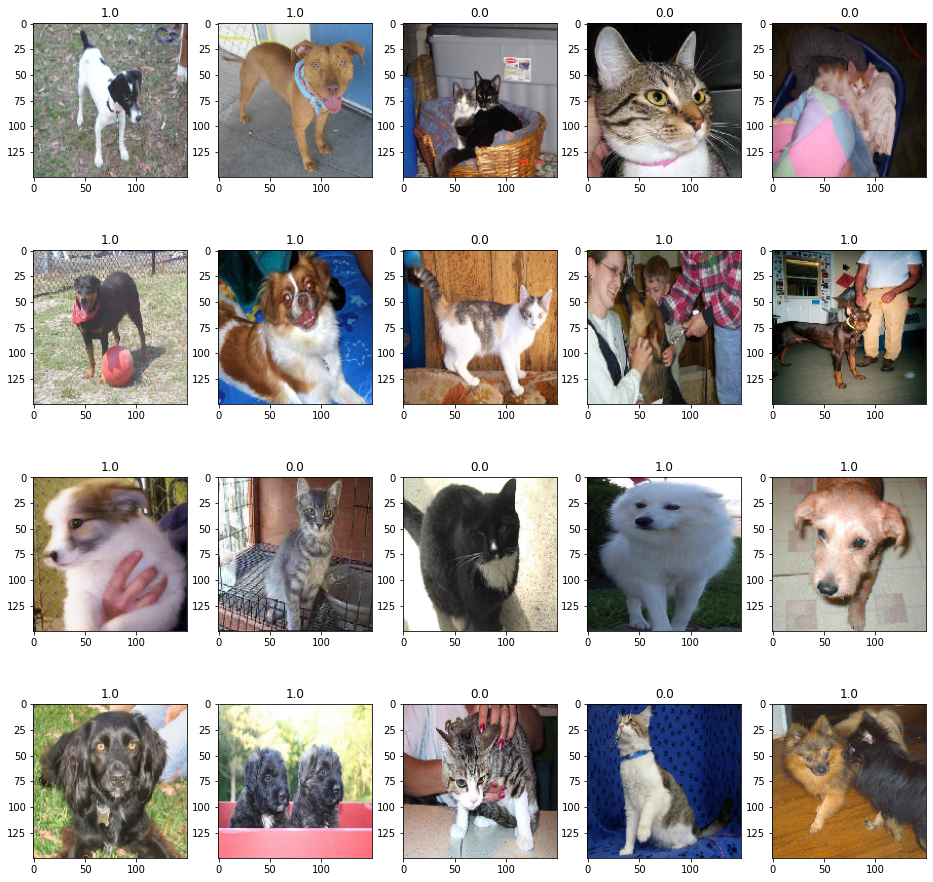

In [ ]:
plt.figure(figsize=(16,16))
pos =1 #plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:]) #to display the image
  plt.title(labels[i])
  plt.axis='off'
  pos+=1

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
model = Sequential()

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(16, 3, activation='relu',input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
model.add(Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(Dense(512, activation='relu'))

# Create output layer with a single node and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
##Compiling the model
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

## Train the mdoel:

In [ ]:
##Train the model
history = model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 9s 93ms/step - loss: 0.7392 - accuracy: 0.5795 - val_loss: 0.6316 - val_accuracy: 0.6470
Epoch 2/15
100/100 [==============================] - 9s 91ms/step - loss: 0.6282 - accuracy: 0.6670 - val_loss: 0.6239 - val_accuracy: 0.6390
Epoch 3/15
100/100 [==============================] - 9s 92ms/step - loss: 0.5554 - accuracy: 0.7130 - val_loss: 0.5659 - val_accuracy: 0.6930
Epoch 4/15
100/100 [==============================] - 9s 91ms/step - loss: 0.4787 - accuracy: 0.7735 - val_loss: 0.6155 - val_accuracy: 0.7150
Epoch 5/15
100/100 [==============================] - 9s 90ms/step - loss: 0.4250 - accuracy: 0.8050 - val_loss: 0.5479 - val_accuracy: 0.7290
Epoch 6/15
100/100 [==============================] - 9s 90ms/step - loss: 0.3549 - accuracy: 0.8390 - val_loss: 0.5497 - val_accuracy: 0.7260
Epoch 7/15
100/100 [==============================] - 9s 90ms/step - loss: 0.2759 - accuracy: 0.8805 - val_loss: 0.6349 - val_accuracy: 0.7340

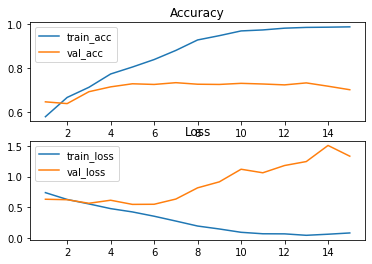

In [ ]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(2,1,2)
epochs=list(range(1,16))
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('Loss')
plt.legend()
#This is Overfitting

## To predict for an image
- 1. read the image
- 2. check the shape
- 3. Resize into required shape
- 4. Apply scaling

In [ ]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/tmp/dog-1210559__340.jpg')
print(type(img))
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))
img = img/255 ##scaling
print(img.shape)
import numpy as np
img = np.expand_dims(img,axis=0)
print(img.shape)

<class 'PIL.WebPImagePlugin.WebPImageFile'>
(340, 453, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
model.predict(img)

array([[1.]], dtype=float32)